# Word2vec

In [1]:
sentences = [['this', 'is', 'a', 'first', 'example', 'of', 'text'],
    ['this', 'is', 'the', 'second', 'example'],
    ['yet', 'another', 'example'],
    ['one', 'more', 'example'],
    ['and', 'the', 'final', 'example']]

In [3]:
from gensim.models import Word2Vec

model = Word2Vec(sentences, min_count=1, vector_size=10,window=3)
print(model)


Word2Vec(vocab=15, vector_size=10, alpha=0.025)


In [4]:
words = list(model.wv.key_to_index)
print(words)



['example', 'the', 'is', 'this', 'final', 'and', 'more', 'one', 'another', 'yet', 'second', 'text', 'of', 'first', 'a']


In [6]:
print("v(final)="+str(model.wv['final']))

# save model
model.save('model.bin')

v(final)=[-0.09604949  0.05007555 -0.08759888 -0.04390896 -0.00036679 -0.00297186
 -0.07661466  0.09617318  0.04981884  0.09234031]


In [7]:
# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

Word2Vec(vocab=15, vector_size=10, alpha=0.025)


In [8]:
X = new_model.wv[new_model.wv.key_to_index]

In [9]:
X.shape

(15, 10)

In [10]:
X

array([[-0.00536121,  0.00236402,  0.05103302,  0.09009207, -0.09302408,
        -0.07116576,  0.06458592,  0.08972262, -0.05015039, -0.03763298],
       [ 0.07380505, -0.01533473, -0.04536615,  0.06554051, -0.0486016 ,
        -0.01816018,  0.0287658 ,  0.00991874, -0.08285215, -0.09448819],
       [ 0.07311766,  0.05070262,  0.06757693,  0.00762866,  0.06350889,
        -0.03405366, -0.00946403,  0.05768573, -0.07521639, -0.03936105],
       [-0.07511582, -0.00930042,  0.09538119, -0.07319167, -0.0233377 ,
        -0.01937742,  0.08077435, -0.05930896,  0.00045161, -0.04753735],
       [-0.09604949,  0.05007555, -0.08759888, -0.04390896, -0.00036679,
        -0.00297186, -0.07661466,  0.09617318,  0.04981884,  0.09234031],
       [-0.08158865,  0.04496669, -0.04137858,  0.00824115,  0.08498045,
        -0.04462619,  0.04517367, -0.06785102, -0.03548497,  0.09399009],
       [-0.01577069,  0.00322178, -0.04140323, -0.07682775, -0.01507944,
         0.02469393, -0.00886958,  0.05533724

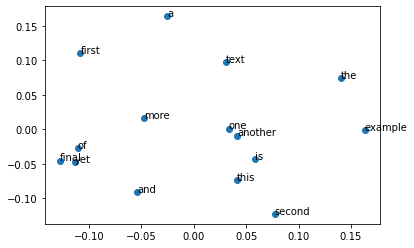

In [11]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

pca = PCA(n_components=2)
result = pca.fit_transform(X)
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.key_to_index)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

In [12]:
import gensim.downloader as api

In [13]:
corpus = api.load('text8')

In [14]:
type(corpus)


text8.Dataset

In [15]:
from gensim.models.word2vec import Word2Vec

model8= Word2Vec(corpus, vector_size=100)

In [19]:
import pandas as pd
X8 = pd.DataFrame(model8.wv[model8.wv.key_to_index])
X8['vocab']=list(model8.wv.key_to_index)

X8_sample = X8.sample(100)

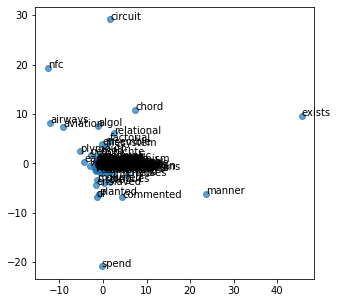

In [20]:
import random
pca = PCA(n_components=2)
result = pca.fit_transform(X8_sample.iloc[:,:-1].apply(lambda x: x*np.random.uniform(low=3, high=4) ))

fig, ax = plt.subplots(figsize = (5, 5))
ax.scatter(result[:, 0], result[:, 1], alpha=0.7)
words = list(X8_sample.iloc[:,-1])

for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

In [21]:
model8.wv['tree']

array([-0.5320696 , -0.68951446,  2.237403  , -0.5746643 , -0.3645877 ,
        0.54958004, -0.8033184 , -1.9089227 , -1.4995077 , -1.4668068 ,
        0.49948585, -2.1621454 ,  0.40922883,  1.3033518 , -2.197585  ,
        3.1335814 ,  2.1337485 ,  0.46260008,  0.13282226, -1.08218   ,
       -0.38964066, -1.4402139 , -0.07919767, -1.6503843 , -1.2923954 ,
       -0.37552646, -0.05470357,  0.18168928, -0.08844481,  0.04676277,
        2.016196  ,  0.1312163 , -0.10781731, -0.0369694 ,  1.2123443 ,
        0.91807973,  2.1695333 , -0.3670523 , -0.7854999 , -0.34920198,
        0.58048475, -0.54293996, -0.6469073 ,  2.2745383 ,  2.8397784 ,
       -0.13660106,  0.14529577, -1.2252648 , -1.2392982 ,  0.67297053,
       -1.3001326 ,  0.00483577, -1.1725768 ,  2.589812  ,  0.4543411 ,
       -0.6556526 ,  0.09678929,  1.3901948 , -2.2088885 ,  0.39329726,
        0.7502626 , -0.71879125, -0.32043785,  2.9537237 , -0.96885884,
       -1.9435899 , -0.6660358 , -1.7045591 ,  1.5616316 , -1.74

In [ ]:
print(model8.wv.most_similar('tree'))

In [31]:
print(model8.wv.most_similar('king'))

[('prince', 0.7349230647087097), ('queen', 0.6996397376060486), ('kings', 0.6904436945915222), ('pharaoh', 0.6875544786453247), ('throne', 0.6736594438552856), ('constantine', 0.669765055179596), ('sultan', 0.6687989234924316), ('emperor', 0.6660114526748657), ('regent', 0.660758376121521), ('aragon', 0.6606883406639099)]


In [24]:
print(model8.wv.doesnt_match("breakfast cereal dinner lunch".split()))

cereal


# Analogies

In [23]:
#v(king)-v(man)+v(woman)
print(model8.wv.most_similar(positive=['king', 'woman'], negative=['man'], topn=3))

[('queen', 0.6474851369857788), ('empress', 0.6153088808059692), ('son', 0.6039918065071106)]


In [24]:
print(model8.wv.most_similar(positive=['renault', 'italy'], negative=['france'], topn=3))


[('isuzu', 0.7054175138473511), ('scuderia', 0.6983029246330261), ('chevrolet', 0.6726912260055542)]


In [29]:
#v(paris)-v(france)+v(germany)=v(x)

print(model8.wv.most_similar(positive=['paris','italy'], negative=['france'], topn=3))


[('venice', 0.7704076170921326), ('florence', 0.7653753757476807), ('vienna', 0.7322647571563721)]


In [30]:
print(model8.wv.most_similar(positive=['beatles', 'usa'], negative=['england'], topn=3))

[('dj', 0.6460015177726746), ('goldmine', 0.5922549962997437), ('britney', 0.5876200199127197)]


In [33]:
model8.wv.most_similar(['apple','fruit'])

[('juice', 0.7299550175666809),
 ('grape', 0.6932923197746277),
 ('milk', 0.6913902163505554),
 ('meat', 0.6755573749542236),
 ('honey', 0.6751770973205566),
 ('vegetable', 0.6732913851737976),
 ('apples', 0.66573566198349),
 ('coffee', 0.6634423732757568),
 ('beans', 0.6624413132667542),
 ('chocolate', 0.6544009447097778)]

##  Loading pre-trained models

In [1]:
# Load pretrained model GoogleNews-vectors-negative300.bin.gz
# https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?usp=sharing

from gensim.models import KeyedVectors
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

In [2]:
print(model.most_similar('tree'))

[('trees', 0.829312264919281), ('pine_tree', 0.7622087001800537), ('oak_tree', 0.731893002986908), ('evergreen_tree', 0.6926872730255127), ('fir_tree', 0.6917218565940857), ('willow_tree', 0.6845874786376953), ('pine_trees', 0.6824266910552979), ('maple_tree', 0.6803498864173889), ('sycamore_tree', 0.6681811213493347), ('tress', 0.6547872424125671)]


In [3]:
print(model.most_similar(positive=['king', 'woman'], negative=['man'], topn=3))

[('queen', 0.7118193507194519), ('monarch', 0.6189674735069275), ('princess', 0.5902431011199951)]


In [27]:
print(model.most_similar(positive=['paris','chile'], negative=['france'], topn=3))


AttributeError: 'Word2Vec' object has no attribute 'most_similar'

In [8]:
print(model.most_similar(positive=['germany', 'monarchy'], negative=['netherlands'], topn=3))


[('Monarchy', 0.4897083640098572), ('constitutional_monarchy', 0.48723939061164856), ('royalists', 0.45945391058921814)]


In [9]:
print(model.most_similar(positive=['italy', 'beatles'], negative=['england'], topn=3))


[('radiohead', 0.5180865526199341), ('metallica', 0.511135458946228), ('quinto', 0.5088788866996765)]


## Glove

In [1]:
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

glove_file = 'glove.42B.300d.txt'
tmp_file = get_tmpfile("test_word2vec.txt")
_ = glove2word2vec(glove_file, tmp_file)

model = KeyedVectors.load_word2vec_format(tmp_file)

<ipython-input-1-3c74b85749f5>:7: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  _ = glove2word2vec(glove_file, tmp_file)


In [3]:
print(model.most_similar('tree'))

[('trees', 0.834145724773407), ('branches', 0.6109411120414734), ('leaf', 0.6104052066802979), ('pine', 0.6100702881813049), ('forest', 0.5894955396652222), ('garden', 0.5828164219856262), ('vine', 0.5765969157218933), ('branch', 0.5740603804588318), ('flower', 0.5736389756202698), ('willow', 0.5727055668830872)]


In [4]:
model.most_similar(positive=['woman', 'king'], negative=['man'])

[('queen', 0.7833545207977295),
 ('prince', 0.5993281006813049),
 ('princess', 0.5823437571525574),
 ('elizabeth', 0.553723931312561),
 ('daughter', 0.544403076171875),
 ('mother', 0.5348593592643738),
 ('mary', 0.5327834486961365),
 ('lady', 0.5133953094482422),
 ('catherine', 0.5069340467453003),
 ('her', 0.4996805489063263)]